In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [48]:
import yfinance as yf
stock_symbol = ['AMD', 'FB', 'FSV', 'INFY', 'KNX', 'MONDY', 'MTDR', 'JINDALSTEL.NS', 'TMUS', 'TSLA', 'TWTR']

def data_download(i):
    data = yf.download(tickers=i,period='1y',interval='1d')[['Close']]
    return(data.reset_index())

dfs = [data_download(s) for s in stock_symbol]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,83.910004,329.510010,165.660004,18.459999,47.439999,56.680000,27.270000,454.250000,134.009995,677.000000,65.089996
1,81.620003,325.079987,162.250000,18.080000,47.119999,55.367001,26.309999,441.500000,132.130005,709.440002,55.220001
2,78.550003,322.579987,162.250000,18.200001,47.580002,55.674999,26.170000,445.299988,131.449997,684.900024,54.580002
3,78.610001,318.359985,159.910004,18.110001,48.500000,54.980000,27.020000,435.750000,128.479996,673.599976,54.400002
4,77.830002,315.019989,163.169998,18.290001,48.619999,56.165001,28.709999,439.399994,134.130005,670.940002,53.560001


In [50]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [51]:
mean_daily_returns * 252

Close_x    0.197569
Close_y   -0.375549
Close_x   -0.227280
Close_y    0.147329
Close_x    0.077718
Close_y   -0.377679
Close_x    0.802472
Close_y    0.287465
Close_x    0.022390
Close_y    0.426972
Close     -0.162335
dtype: float64

In [52]:
volatilities * 252

Close_x    8.067637
Close_y    7.460343
Close_x    4.339320
Close_y    4.366554
Close_x    4.511473
Close_y    5.591180
Close_x    8.939057
Close_y    6.956065
Close_x    4.286003
Close_y    8.882558
Close      8.301091
dtype: float64

In [53]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

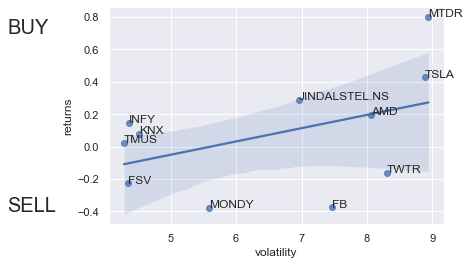

In [57]:
g = sns.regplot("volatility", "returns", data=combine)

for i in range(combine.shape[0]):
    plt.annotate(stock_symbol[i], (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(2.5, -0.4, 'SELL', fontsize=20)
plt.text(2.5, 0.7, 'BUY', fontsize=20)
    
plt.show()